Regressão linear
================



## Coleta de dados



Os dados abaixo foram coletados através de um formulário digital respondido pelos alunos da Ilum da turma de 2023. Consulta realizada no segundo semestre de 2023.



In [1]:
import pandas as pd

dicionario_contendo_os_dados = {
    "altura": [174, 182, 169, 162, 161, 188, 152, 160, 180, 153, 155, 170, 170,
        191, 169, 176, 175, 170, 161, 184, 175, 176, 169, 170, 170, 171, 175],
    "num_sapato": [42, 40, 37, 39, 36, 44, 32, 35, 40, 35, 35, 42, 40, 47, 39,
        40, 40, 40, 39, 44, 42, 41, 42, 40, 38, 42, 41],
    "mes_aniversario": [10, 5, 10, 9, 5, 11, 7, 5, 11, 5, 2, 3, 1, 11, 9, 10, 8,
        5, 6, 2, 1, 6, 12, 5, 7, 3, 12],
    "num_livros_lidos": [3, 5, 10, 20, 7, 7, 3, 34, 5, 7, 8, 7, 0, 15, 8, 5, 10,
        2, 2, 13, 5, 32, 0, 4, 1, 2, 30],
}

df = pd.DataFrame.from_dict(dicionario_contendo_os_dados)

print(df)

    altura  num_sapato  mes_aniversario  num_livros_lidos
0      174          42               10                 3
1      182          40                5                 5
2      169          37               10                10
3      162          39                9                20
4      161          36                5                 7
5      188          44               11                 7
6      152          32                7                 3
7      160          35                5                34
8      180          40               11                 5
9      153          35                5                 7
10     155          35                2                 8
11     170          42                3                 7
12     170          40                1                 0
13     191          47               11                15
14     169          39                9                 8
15     176          40               10                 5
16     175    

## Visualização dos dados



Observe no gráfico abaixo que existe uma correlação positiva entre altura e número de sapato que a pessoa calça. Vendo esta correlação, será que conseguimos propor um modelo para prever o número de sapato de uma pessoa apenas conhecendo a sua altura?



Text(0, 0.5, 'Número de sapato que calça')

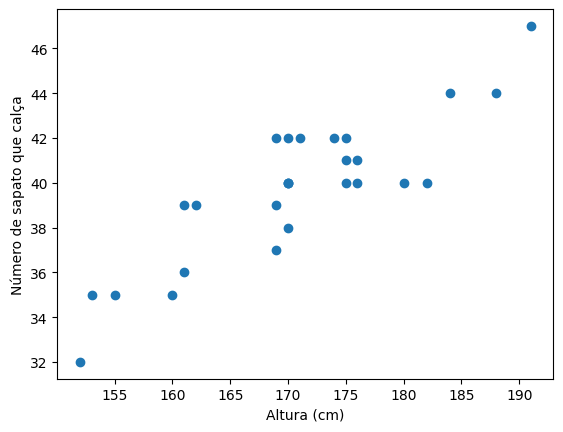

In [2]:
from matplotlib import pyplot as plt

x = df["altura"].values
y = df["num_sapato"].values

figura, eixo = plt.subplots()

eixo.plot(x, y, marker="o", linestyle="none")
eixo.set_xlabel("Altura (cm)")
eixo.set_ylabel("Número de sapato que calça")

Ao ver o gráfico, observamos que a correlação entre altura e número de sapato não é *perfeita*, existem pessoas de mesma altura com número de sapatos diferentes. Com isso já sabemos de qualquer modelo que receba apenas altura como atributo não será capaz de prever o número de sapato perfeitamente. Mas será que conseguimos pelo menos um modelo razoável para este problema?



## O modelo linear



Um modelo linear bastante simples é

$$
y = \beta_0 + \beta_1 x,
$$

onde $\beta_0$ é o *intercepto* do modelo (valor que o modelo retorna quando $x=0$) e $\beta_1$ é a *inclinação* (valor adicionado à $y$ para cada aumento em 1 de $x$). Vamos ver um gráfico deste modelo com $\beta_0=3$ e $\beta_1=2$.



Text(0, 0.5, '$y$')

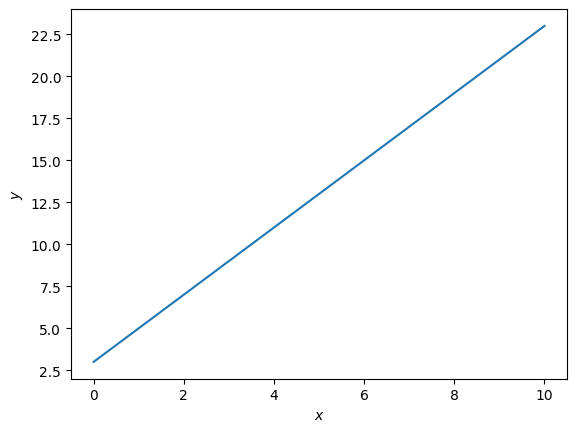

In [3]:
import numpy as np

beta0 = 3
beta1 = 2

x = np.linspace(0, 10)
y = beta0 + beta1 * x

figura, eixo = plt.subplots()

eixo.plot(x, y)
eixo.set_xlabel("$x$")
eixo.set_ylabel("$y$")

## O modelo linear probabilístico



O modelo linear apresentado acima é chamado de *determinístico* pois ele assume que a relação entre $x$ e $y$ é perfeitamente descrita apenas com os parâmetros $\beta_0$ e $\beta_1$. Em situações mais reais (como no gráfico do tamanho de sapato por altura) nós observamos um espalhamento dos dados e o modelo determinístico não é suficiente para modelarmos estes fenômenos.

O modelo linear probabilístico leva em consideração que existe uma incerteza irredutível no nosso modelo, representada por $\epsilon$ (também conhecida como *desvio aleatório* ou *termo do erro aleatório*).

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Para cada tupla de dados $(x_n, y_n)$, temos um valor $\epsilon_n$ associado. Podemos ter três casos quando levamos em conta o valor $\hat{y}_n$ previsto pelo modelo:

1.  Se $\hat{y}_n = y_n$, então temos que $\epsilon_n = 0$

2.  Se $\hat{y}_n > y_n$, então temos que $\epsilon_n < 0$

3.  Se $\hat{y}_n < y_n$, então temos que $\epsilon_n > 0$

Uma suposição de modelos lineares probabilísticos é que $\epsilon$ é uma variável aleatória que segue uma distrição normal com média zero. Se você tem um modelo linear que não segue esta suposição, isso pode ser um problema.

Uma forma interativa de entender o modelo linear apresentado é utilizando esta excelente ferramenta online do [PhET](https://phet.colorado.edu/en/simulations/least-squares-regression).



## Encontrando os parâmetros de um modelo linear



Vamos retornar aos dados que coletamos.



Text(0, 0.5, 'Número de sapato que calça')

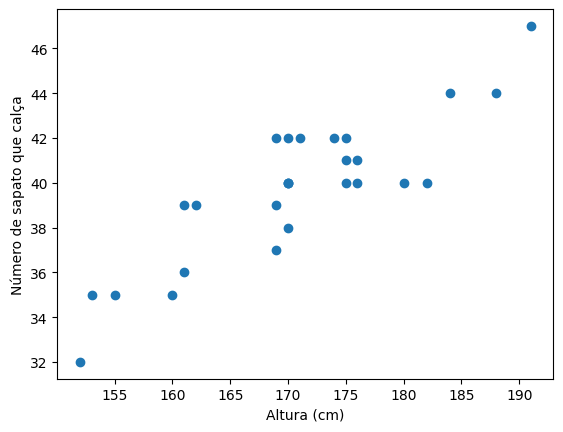

In [4]:
from matplotlib import pyplot as plt

x = df["altura"].values
y = df["num_sapato"].values

figura, eixo = plt.subplots()

eixo.plot(x, y, marker="o", linestyle="none")
eixo.set_xlabel("Altura (cm)")
eixo.set_ylabel("Número de sapato que calça")

Digamos que nós temos interesse em ajustar um modelo linear a estes dados. Ajustar um modelo linear significa encontrar estimativas para os valores de $\beta_0$ e $\beta_1$ que minimizem uma certa *função de custo*.

A função de custo é uma função que quantifica de alguma maneira o quão ruim é seu modelo. Sabendo disso, seu interesse é de *minimizar* a sua função de custo, a fim de ter o modelo menos ruim possível (que no final das contas pode ou não ser um bom modelo).

Uma função de custo clássica é justamente o erro quadrático médio (MSE) que vimos no notebook anterior.

Para fins didáticos, suponha que você tem o valor fixo de $\beta_0=3$. Vamos ver o que acontece com o MSE ao variarmos o $\beta_1$.



Text(0.5, 1.0, 'Variação do MSE com $\\beta_0=3$')

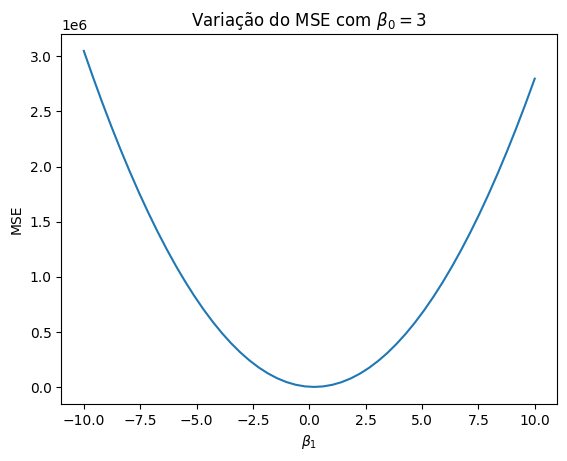

In [5]:
import numpy as np

x = df["altura"].values
y = df["num_sapato"].values

beta0 = 3
beta1 = np.linspace(-10, 10)

MSE = []

for b1 in beta1:
    y_chapeu = beta0 + b1 * x
    mse = sum((y - y_chapeu) ** 2) / len(y)
    MSE.append(mse)

figura, eixo = plt.subplots()

eixo.plot(beta1, MSE)
eixo.set_xlabel(r"$\beta_1$")
eixo.set_ylabel("MSE")
eixo.set_title(r"Variação do MSE com $\beta_0=3$")

De forma similar, vamos supor um valor fixo de $\beta_1=1$ e observar o que acontece com o MSE ao variarmos $\beta_0$.



Text(0.5, 1.0, 'Variação do MSE com $\\beta_1=1$')

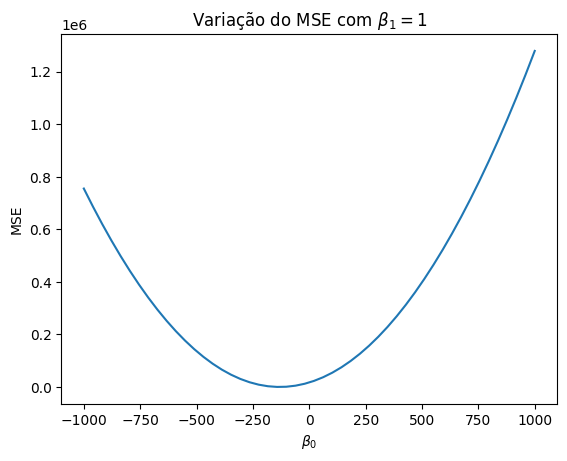

In [6]:
import numpy as np

x = df["altura"].values
y = df["num_sapato"].values

beta0 = np.linspace(-1000, 1000)
beta1 = 1

MSE = []

for b0 in beta0:
    y_chapeu = b0 + beta1 * x
    mse = sum((y - y_chapeu) ** 2) / len(y)
    MSE.append(mse)

figura, eixo = plt.subplots()

eixo.plot(beta0, MSE)
eixo.set_xlabel(r"$\beta_0$")
eixo.set_ylabel("MSE")
eixo.set_title(r"Variação do MSE com $\beta_1=1$")

Observe que nos dois casos nós observamos valores onde a função de custo (MSE) apresenta um valor mínimo. Ajustar o modelo linear significa encontrar um par de estimativas $(\hat{\beta}_0, \hat{\beta}_1)$ que minimizam a função custo.

Para o modelo linear probabilístico que foi apresentado acima, nós temos duas estratégias para encontrar os parâmetros $\beta$ do modelo:

1.  **Álgebra Linear**: é possível computar os valores $\beta_0$ e $\beta_1$ utilizando-se de estratégias de álgebra linear. Para mais detalhes, ver capítulo 12.2 da referência [1].

2.  **Métodos de otimização**: é possível estimar o par $(\hat{\beta}_0, \hat{\beta}_1)$ utilizando-se de algoritmos de otimização. O algoritmo mais comum dentro da área de aprendizado de máquina é a *descida do gradiente*. A referência [2] tem um simulador da descida do gradiente. Este é um tópico que veremos com mais detalhes na disciplina Redes Neurais e Algoritmos Genéticos e na disciplina Otimização.



## O modelo baseline



Um modelo ainda mais simples que o linear é o chamado de modelo de base ou *baseline*. Neste modelo, consideramos que $\beta_1=0$, o que resulta em

$$
y = \beta_0 + \epsilon.
$$

Observe que para prever o valor de $y$ nós não utilizamos de nenhuma informação de $x$ neste modelo. Se sua função de custo é o erro quadrático médio (MSE), então o valor de $\beta_0$ passa a ser $E(y)$, que é o valor esperado de $y$. Sendo $y$ um conjunto finito de dados, temos que $E(y)$ é a média de $y$.

Este é o tipo de modelo que chamamos de dummy, baseline, linha de base ou modelo fictício. Trata-se de um modelo muito simples que podemos usar para comparar a performance dos nossos modelos. Qualquer modelo com performance pior que um modelo baseline é um modelo bastante ruim.

Use o `scikit-learn` para criar um modelo baseline. Veja a documentação [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html).



## O modelo linear múltiplo (mais de uma variável independente)



Quando temos um modelo linear com mais de um atributo ($x_1$, $x_2$, &#x2026;, $x_n$), chamamos esse modelo de *modelo linear múltiplo* (multiple linear model em inglês). A expressão para este modelo é:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon.
$$

Cada parâmetro $\beta_p$ com $p \geq 1$ está associado a um atributo $x_p$. Podemos pensar que os parâmetros $\beta_p$ são os pesos de cada atributo (em outras palavras, são o quanto cada atributo contribui na hora de computar $y$).

O `scikit-learn` pode nos permite induzir modelos lineares múltiplos. Veja a documentação [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).



## Referências



1.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

2.  Link da MLU sobre regressão linear [https://mlu-explain.github.io/linear-regression/](https://mlu-explain.github.io/linear-regression/)

3.  Simulador do PhET [https://phet.colorado.edu/en/simulations/least-squares-regression](https://phet.colorado.edu/en/simulations/least-squares-regression)

